# 기말고사 대비 정리

- toc : true
- hide : false
- published : true
- author : 이강철
- branch : true
- comment : true

## (9주차) 5월 1일

### import

In [12]:
import numpy as np
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
import matplotlib.pyplot as plt

In [2]:
tnp.experimental_enable_numpy_behavior()

### MLE

* 우도 함수 : 특정 모수가 주어졌을 때 추출된 샘플들이 얻어질 확률(정확히는 가능도)을 계산하는 함수

* 확률이라는 말을 쓸 수 없는 이유는 다음과 같다. 

> example : $0.499 \leq p \leq 0.501$ 이라 정의 후 샘플 $x= [0,1,0,1]$이 얻어질 확률을 구해보자

$\divideontimes\,\,p : P(x=1)$ 

In [5]:
_plist =  np.linspace(0.499,0.501,1000)
_prob = [(1-p)*p*(1-p)*p for p in _plist]

In [6]:
sum(_prob)

62.49983299986714

* 확률은 주어진 표본 공간에서 모든 경우의 수에 대한 확률의 합이 1이되어야 한다. $\to$ 따라서 확률이라는 표현보다느 **"가능도"** 라는 표현을 쓰자

* 우리가 궁금한 것은 "$p=?$" 이다.

In [7]:
_prob[:5]

[0.06249950000099999,
 0.06249950200099,
 0.06249950399697206,
 0.06249950598894615,
 0.062499507976912276]

* 위 리스트를 `_prob` 이라고 명명하였지만 사실은 `likelhood` 이다.

* 이를 $L(p)$ 라고 정의하자.

$$L(p) = \prod_{i=1}^n f(x_i;p)$$

* $L(p) : p$의 가능도 함수 $\to$ 모수$(p)$가 주어졌을 때 샘플 $(0,1,0,1)$이 얻어질 확률

* $MLE$ : $L(p)$를 최대로 하는 $\hat{p}$

$$\hat {p}_{mle} = \text {argmax}_{p}L(p)$$

* 로지스틱 회귀모형에서 $(w_0,w_1)$의 MLE를 구하는 것은 $BCELoss$를 최소화하는 $(w_0,w_1)$를 구하는 것과 동일하다.
  * 이거는 왜그런지 이해안될 때마다 수식써보자($\star\star\star$)

* 일단 회귀모형에서는 오차항이 정규분포를 따를 때 $-\log\,L(\beta_0,\beta_1)$을 통해 $MLE$ 구하는 것은 $MSE$를 통해 최적의 $\beta_0,\beta_1$을 추정하는 것과 같다.
  * 즉 $\boldsymbol {\beta}_{mle}=\boldsymbol {\beta}_{mse}$

* why? $\varepsilon =  (y-\boldsymbol{X\hat{\beta}})$ 

* 즉 오차항을 최소로하는 최적의 베타는 우도 함수에서 최대의 설명력을 가지기 때문이다~~

### 중간고사 3번 (overfit\)

* `3번 문제`에서 생성한 모형은 과적합이 아니다.
  * 회귀분석에서는 $n$이 커질수록 유의미하지 않은 변수가 0으로 추정된다.
  * 이러한 신기한 일이 일어나는 이유는 모든 설명변수가 직교하기 때문 $\to$ 이 수업에서는 그냥 설명변수들이 서로 독립이라고 생각하자
  * 이러한 모형의 장점 : overfit이 일어날 위험이 없으므로 `train/test`로 나누어 학습할 이유가 없다.(샘플만 버리는 꼴로, test빼둔 샘플까지 모아서 학습해 $\beta$를 좀 더 정확히 추론하는게 차라리 이득)
  * 이러한 모형에서 할일 : 추정된 계수들이 0인지 아닌지만 test하면 된다.(이것을 유의성 검정이라고 한다.)

### 색 표현

* 우리는 빨강, 노랑, 파랑으로 모든 색깔을 표현할 수 있다.($\star\star\star$)

* 그 이유는 빨강, 노랑, 파랑이 직교기저이기 때문이다.($\star\star\star$)

$$\text {color} =  \text{red}\times \beta_1+ \text{blue}\times \beta_2+ \text{yellow} \times\beta_3$$

### 경사하강법과 확률적 경사하강법

#### 경사하강법

* gradient descent : 한 번에 에폭에서 파라미터 업데이트시 모든 샘플을 이용

#### 확률적 경사하강법

* stochastic gradient descent
  * 예전 : 1 epoch $\to \text{sample_size}=1$
  * 현재 : 예전 1 epoch $\to \text{sample_size}=m\quad (m\leq n)$ 

#### 비교

* 전제 : 한번에 한 개의 파라미터를 업데이트 할 때
  * 메모리 사용량 : 경사하강법 > 확률적 경사하강법
  * 계산 속도 : 경사하강법 > 확률적 경사하강법
  * local_min에 갇힘 : 경사하강법 > 확률적 경사하강법 (이건 알고리즘 구성에 따라 달라짐)

* 경사하강법은 `local_min`을 잘 찾는다.
* 확률적 경사하강법은 운좋게 `local_min`을 탈출한다.

`-` 틀리진 않지만 어색한 블로그 내용들 정리

* 경사하강법은 종종 국소최소점의 갇히는 문제가 있다. 이를 해결하기 위해서 등장한 방법이 확률적 경사하강법이다.(X)
  * 틀린말은 아니나 이것을 의도하고 만든 것은 아님. 가끔 그럴 때도 있는 것이지 확률적 경사하강법을 쓴다고 `local_minimum`에 빠지지 않는 것은 아니다.


* 경사하강법은 계산 시간이 오래 걸린다(O). 계산을 빠르게 하기 위해서 등장한 방법이 확률적 경사하강법이다(O)
  * 1회 업데이트는 빠르게 계산하나, 그것이 최적의 $\beta$를 빠르게 얻을 수 있는 것은 아니다.

#### 결론

* 확률적 경사하강법을 쓰는 이유는 메모리적 문제이다. 메모리를 아끼기 위해 우리는 `tf.Variable`을 이용한다.

* 그런데 `Gradient`를 계산하려면 `loss`를 계산해야 하고 샘플 $(y, \hat y)$를 전부 메모리상에 올려야한다.

* 위 같은 경우 GPU가 샘플의 일부만 올라갈 수 있다면 미니배치방법인 확률적 경사하강법을 사용해야기 때문에 확률적 경사하강벙을 사용한다.

***

### fashion_mnist 모듈

#### 데이터 생성 및 탐색

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [10]:
x_train.shape

(60000, 28, 28)

* 60000은 샘플 수
* (28,28)은 픽셀을 의미한다.

* 첫 번째 관측값

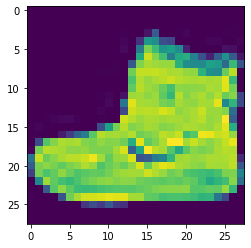

In [16]:
plt.imshow(x_train[0])

In [17]:
y_train[0]

9

* 아 라벨 명이 `9`인 $y$는 신발임을 알 수 있다.

#### 로지스틱 모형 적합

* $y =0,1$에 대응하는 이미지만 추출해보자.

In [29]:
train_y = y_train[(y_train==0)|(y_train==1)].reshape(-1,1)
test_y = y_test[(y_test==0)|(y_test==1)].reshape(-1,1)

train_x = x_train[(y_train==0)|(y_train==1)].reshape(-1,784)
test_x = x_test[(y_test==0)|(y_test==1)].reshape(-1,784)

##### 풀이 1: 은닉층을 포함한 신경망

* 은닉층 노드 개수 : 30
* 옵티마이저 : sgd
* 옵티마이저는 `sgd` 이나 배치사이즈를 `train_data`에 샘플사이즈로 하였기 때문에 경사하강법으로 취급한다.

In [30]:
train_x.shape

(12000, 784)

In [39]:
tf.random.set_seed(20222)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation="relu"))
net.add(tf.keras.layers.Dense(1,activation="sigmoid"))
net.compile(optimizer="sgd",loss=tf.losses.binary_crossentropy)
net.fit(train_x,train_y,epochs=100,verbose=0,batch_size=12000)

* train error

In [40]:
np.mean((net(train_x)>0.5) == train_y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.508>

* test error

In [41]:
np.mean((net(test_x)>0.5) == test_y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.508>

##### 풀이 2 : adam

In [42]:
tf.random.set_seed(20222)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation="relu"))
net.add(tf.keras.layers.Dense(1,activation="sigmoid"))
net.compile(optimizer="adam",loss=tf.losses.binary_crossentropy)
net.fit(train_x,train_y,epochs=100,verbose=0,batch_size=12000)

* train error

In [43]:
np.mean((net(train_x)>0.5) == train_y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9819166666666667>

* test error

In [44]:
np.mean((net(test_x)>0.5) == test_y)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9795>

##### 풀이 3 : metrics=["accuracy"]

In [45]:
tf.random.set_seed(20222)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation="relu"))
net.add(tf.keras.layers.Dense(1,activation="sigmoid"))
net.compile(optimizer="adam",loss=tf.losses.binary_crossentropy,metrics=["accuracy"])
net.fit(train_x,train_y,epochs=100,verbose=0,batch_size=12000)

In [47]:
net.evaluate(train_x,train_y)

375/375 [==============================] - 2s 3ms/step - loss: 0.4869 - accuracy: 0.9819


[0.4869031608104706, 0.9819166660308838]

In [48]:
net.evaluate(test_x,test_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.9795


[0.6732255220413208, 0.9794999957084656]

##### 풀이 4 : 확률적 경사하강법 이용 epochs=10

* batch_size = 120
* 1 epoch $\to$ 100 iteration

In [49]:
tf.random.set_seed(20222)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation="relu"))
net.add(tf.keras.layers.Dense(1,activation="sigmoid"))
net.compile(optimizer="adam",loss=tf.losses.binary_crossentropy,metrics=["accuracy"])
net.fit(train_x,train_y,epochs=100,verbose=0,batch_size=120)

In [50]:
net.evaluate(train_x,train_y)

375/375 [==============================] - 1s 1ms/step - loss: 0.0303 - accuracy: 0.9955


[0.030314888805150986, 0.9955000281333923]

In [51]:
net.evaluate(test_x,test_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9880


[0.1709846556186676, 0.9879999756813049]